Kaggle dataset - https://www.kaggle.com/mirichoi0218/insurance

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
#Importing needed packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
data = pd.read_csv('../input/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


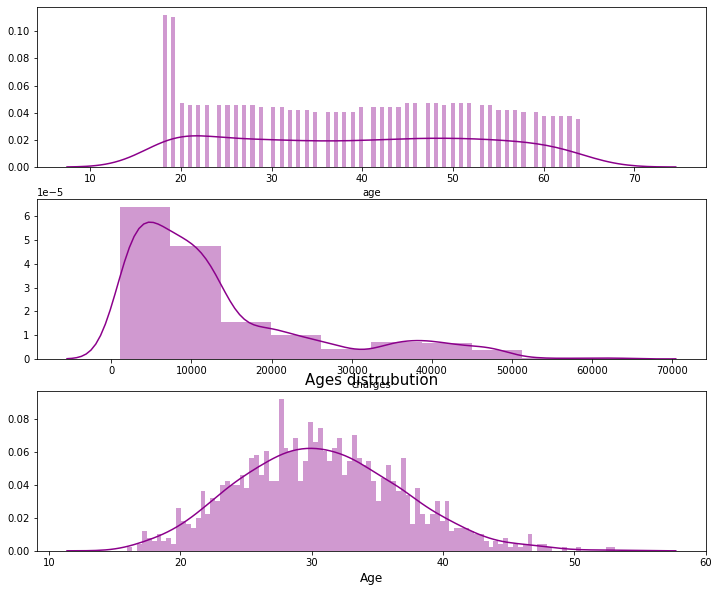

In [44]:
#Making a distplot
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.distplot(a=data['age'], color='darkmagenta', bins=100) 

plt.subplot(3,1,2)
sns.distplot(a=data['charges'], color='darkmagenta', bins=100)

plt.subplot(3,1,3)
sns.distplot(a=data['bmi'], color='darkmagenta', bins=100)


plt.title('Ages distrubution', size='15')
plt.xlabel('Age',size=12)
plt.show()



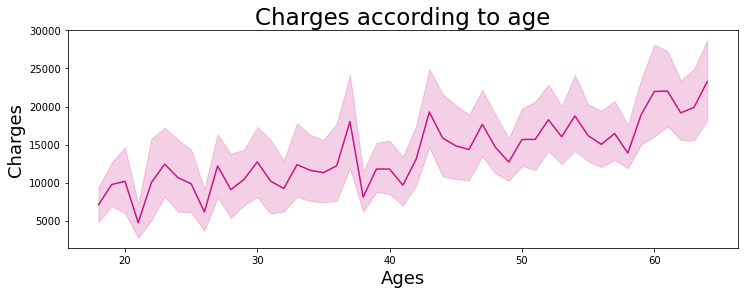

In [27]:
#Making a lineplot to check if there is any correlation between age and charges
plt.figure(figsize=(12,4))
sns.lineplot(x='age', y='charges', data=data, color='mediumvioletred')
plt.title('Charges according to age', size='23')
plt.ylabel('Charges',size=18)
plt.xlabel('Ages',size=18)
plt.show()

In [70]:
#Creating another column containing bins of charges
data['charges_bins'] = pd.cut(data['charges'], bins=[0, 15000, 30000, 45000, 60000, 75000])

#Making bins for the ages
data['age_bins'] = pd.cut(data['age'], bins = [0, 20, 35, 50, 70])


#Making bins and labels for the BMI
bins = [0, 18.5, 25, 30, 35, 40, 60]
labels = ['Underweight', 'Average', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3']
data['bmi_bins'] = pd.cut(data['bmi'], bins=bins, labels=labels)

data.head()

,age,sex,bmi,children,smoker,region,charges,charges_bins,age_bins,bmi_bins
0,19,female,27.900,0,yes,southwest,16884.92400,"(15000, 30000]","(0, 20]",Overweight
1,18,male,33.770,1,no,southeast,1725.55230,"(0, 15000]","(0, 20]",Obese 1
2,28,male,33.000,3,no,southeast,4449.46200,"(0, 15000]","(20, 35]",Obese 1
3,33,male,22.705,0,no,northwest,21984.47061,"(15000, 30000]","(20, 35]",Average
4,32,male,28.880,0,no,northwest,3866.85520,"(0, 15000]","(20, 35]",Overweight


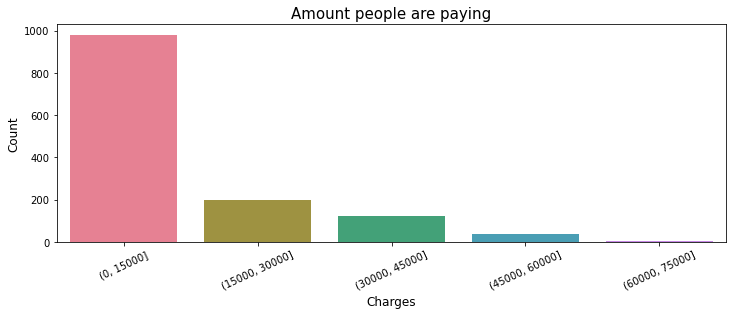

In [52]:
#Creating a countplot based on the amount of charges
plt.figure(figsize=(12,4))

sns.countplot(x='charges_bins', data=data, palette='husl') 
plt.title('Amount people are paying', size='15')
plt.xticks(rotation='25')
plt.ylabel('Count',size=12)
plt.xlabel('Charges',size=12)
plt.show()



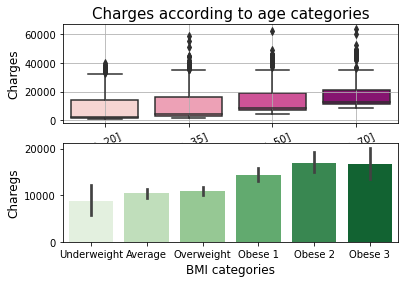

In [67]:
#Creating boxplots based on the amount of diffrent age categories
plt.subplot(2,1,1)
sns.boxplot(x='age_bins', y='charges', data=data, palette='RdPu') 
plt.title('Charges according to age categories', size='15')
plt.xticks(rotation='25')
plt.grid(True)
plt.ylabel('Charges',size=12)
plt.xlabel('Age',size=12)

plt.subplot(2,1,2)
#Checking the charges according to BMI 
sns.barplot(x='bmi_bins', y='charges', data=data, palette='Greens')
plt.title('')
plt.ylabel('Charegs',size=12)
plt.xlabel('BMI categories',size=12)
plt.show()


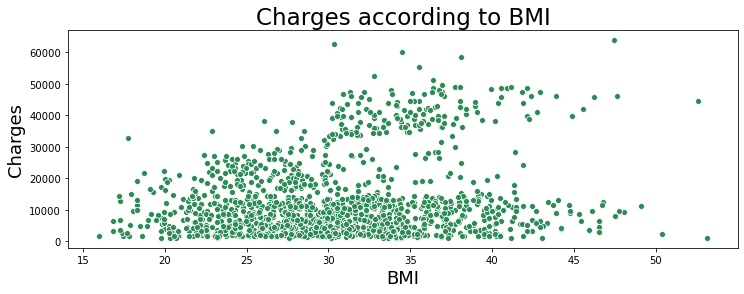

In [54]:
#Scatterplot to check for correlation 
plt.figure(figsize=(12,4))
sns.scatterplot(x='bmi', y='charges', data=data, color='seagreen')
plt.title('Charges according to BMI', size='23')
plt.ylabel('Charges',size=18)
plt.xlabel('BMI',size=18)
plt.show()

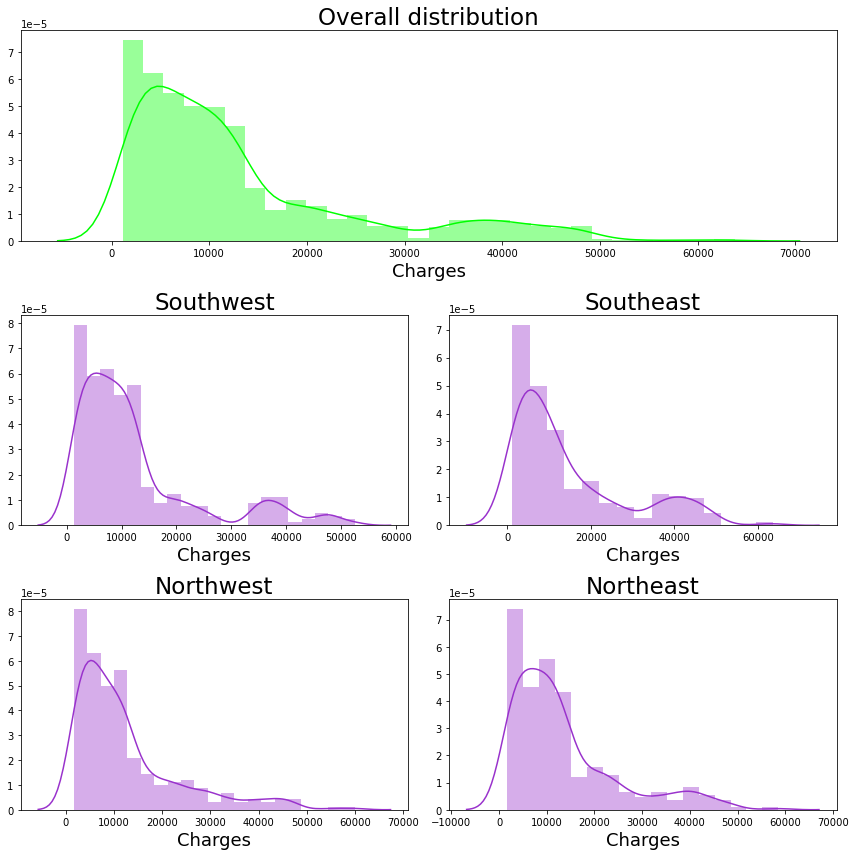

In [71]:
#Creating distplots to compare charges distributions for diffrent regions and the overall dsitribution of charges
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((3,2),(0,0), colspan=2)
ax2 = plt.subplot2grid((3,2),(1,0))
ax3 = plt.subplot2grid((3,2),(1,1))
ax4 = plt.subplot2grid((3,2),(2,0))
ax5 = plt.subplot2grid((3,2),(2,1))
sns.distplot(a=data['charges'], ax=ax1,  color='lime')
ax1.set_title('Overall distribution',size='23')
ax1.set_xlabel('Charges',size=18)

axis = [ax2, ax3, ax4, ax5]
regions = ['southwest', 'southeast', 'northwest', 'northeast']
for axe, region in zip(axis, regions):
    data1 = data[data['region']==region]
    sns.distplot(a=data1['charges'], ax=axe,  color='darkorchid')
ax2.set_title('Southwest', size='23')
ax2.set_xlabel('Charges',size=18)
ax3.set_title('Southeast', size='23')
ax3.set_xlabel('Charges',size=18)
ax4.set_title('Northwest', size='23')
ax4.set_xlabel('Charges',size=18)
ax5.set_title('Northeast', size='23')
ax5.set_xlabel('Charges',size=18)
plt.tight_layout()
plt.show()

ValueError: num must be 1 <= num <= 2, not 3

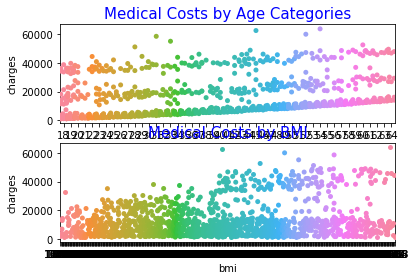

In [75]:
plt.subplot(2,1,1)
sns.swarmplot(x="age", y="charges", data=data)
plt.title('Medical Costs by Age Categories', color = 'blue', fontsize=15)

plt.subplot(2,1,2)
sns.swarmplot(x="bmi", y="charges", data=data)
plt.title('Medical Costs by BMI', color = 'blue', fontsize=15)

plt.subplot(2,1,3)
sns.swarmplot(x="sex", y="charges", data=data)
plt.title('Medical Costs by Gender', color = 'blue', fontsize=15)

plt.subplot(2,1,4)
sns.swarmplot(x="children", y="charges", data=data)
plt.title('Medical Costs by Number of Children', color = 'blue', fontsize=15)

plt.subplot(2,1,5)
sns.swarmplot(x="smoker", y="charges", data=data)
plt.title('Medical Costs by Smoking', color = 'blue', fontsize=15)

plt.subplot(2,1,6)
sns.swarmplot(x="region", y="charges", data=data)
plt.title('Medical Costs by Region', color = 'blue', fontsize=15)
plt.show()
